<a href="https://colab.research.google.com/github/justwannachill/NM/blob/main/%D0%9B%D0%912_%D0%A8%D0%B8%D0%BB%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шилов Данііл
ФІТ 3-15
Варіант 16

In [ ]:
import pandas as pd
import numpy as np
import requests

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)   # зчитати всі таблиці
df = tables[3]                # потрібна таблиця (може змінюватись!), номери не є сталими!
df.head()

/tmp/ipython-input-1448736535.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)   # зчитати всі таблиці


,Country/Territory,IMF (2025)[6],World Bank (2024)[7],United Nations (2024)[8]
0,World,117165394,111326370,100834796
1,United States,30615743,28750956,29298000
2,China[n 1],19398577,18743803,18743802
3,Germany,5013574,4685593,4659929
4,Japan,4279828,4027598,4026211


In [ ]:
df.columns

Index(['Country/Territory', 'IMF (2025)[6]', 'World Bank (2024)[7]',
       'United Nations (2024)[8]'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[6]             222 non-null    object
 2   World Bank (2024)[7]      222 non-null    object
 3   United Nations (2024)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [ ]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  # прибрати [1], [6], ...
              .str.replace('Country/Territory', 'Country', regex=False))
df


,Country,IMF (2025),World Bank (2024),United Nations (2024)
0,World,117165394,111326370,100834796
1,United States,30615743,28750956,29298000
2,China[n 1],19398577,18743803,18743802
3,Germany,5013574,4685593,4659929
4,Japan,4279828,4027598,4026211
...,...,...,...,...
217,Kiribati,321,308,343
218,Marshall Islands,302,290,281
219,Nauru,172,163,187
220,Montserrat,—N/a,—N/a,81


In [ ]:
df.isnull().sum()

,0
Country,0
IMF (2025),0
World Bank (2024),0
United Nations (2024),0


In [ ]:
# Convert columns to float type
df['IMF (2025)'] = pd.to_numeric(df['IMF (2025)'], errors='coerce')
df['World Bank (2024)'] = pd.to_numeric(df['World Bank (2024)'], errors='coerce')
df['United Nations (2024)'] = pd.to_numeric(df['United Nations (2024)'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Country                   object
IMF (2025)               float64
World Bank (2024)        float64
United Nations (2024)    float64
dtype: object


,Country,IMF (2025),World Bank (2024),United Nations (2024)
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,28750956.0,29298000.0
2,China[n 1],19398577.0,18743803.0,18743802.0
3,Germany,5013574.0,4685593.0,4659929.0
4,Japan,4279828.0,4027598.0,4026211.0
5,India,4125213.0,3909892.0,3952244.0
6,United Kingdom,3958780.0,3686033.0,3685881.0
7,France,3361557.0,3160443.0,3160443.0
8,Italy,2543677.0,2380825.0,2380825.0
9,Russia,2540656.0,2173836.0,2173386.0


In [ ]:
df.isnull().sum()

,0
Country,0
IMF (2025),30
World Bank (2024),29
United Nations (2024),9


In [ ]:
part = df.iloc[:, 1:]

row_filled = part.apply(lambda r: r.fillna(r.mean()), axis=1)
col_means = part.mean()

df.iloc[:, 1:] = row_filled.fillna(col_means)

df.isnull().sum()


,0
Country,0
IMF (2025),0
World Bank (2024),0
United Nations (2024),0


In [ ]:
df

,Country,IMF (2025),World Bank (2024),United Nations (2024)
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,28750956.0,29298000.0
2,China[n 1],19398577.0,18743803.0,18743802.0
3,Germany,5013574.0,4685593.0,4659929.0
4,Japan,4279828.0,4027598.0,4026211.0
...,...,...,...,...
217,Kiribati,321.0,308.0,343.0
218,Marshall Islands,302.0,290.0,281.0
219,Nauru,172.0,163.0,187.0
220,Montserrat,81.0,81.0,81.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df[df["Country"] != "World"]
df


,Country,IMF (2025),World Bank (2024),United Nations (2024)
1,United States,30615743.0,28750956.0,29298000.0
2,China[n 1],19398577.0,18743803.0,18743802.0
3,Germany,5013574.0,4685593.0,4659929.0
4,Japan,4279828.0,4027598.0,4026211.0
5,India,4125213.0,3909892.0,3952244.0
...,...,...,...,...
217,Kiribati,321.0,308.0,343.0
218,Marshall Islands,302.0,290.0,281.0
219,Nauru,172.0,163.0,187.0
220,Montserrat,81.0,81.0,81.0


In [ ]:
df.describe()

,IMF (2025),World Bank (2024),United Nations (2024)
count,2.210000e+02,2.210000e+02,2.210000e+02
mean,5.704988e+05,5.392091e+05,5.366993e+05
std,2.518356e+06,2.383144e+06,2.411878e+06
min,5.800000e+01,5.700000e+01,5.600000e+01
25%,9.353000e+03,9.026000e+03,8.628000e+03
50%,4.551300e+04,4.291400e+04,4.269200e+04
75%,3.147240e+05,2.914800e+05,2.914800e+05
max,3.061574e+07,2.875096e+07,2.929800e+07


In [ ]:
# Count difference between IMF_Forecast and WB_Estimate for each country
df['IMF_WB_Diff'] = abs(df['IMF (2025)'] - df['World Bank (2024)'])

# Find which country has the largest difference between IMF and WB
max_diff = df['IMF_WB_Diff'].max()

country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

United States has the largest difference between IMF and WB: 1864787.0


/tmp/ipython-input-2355212038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMF_WB_Diff'] = abs(df['IMF (2025)'] - df['World Bank (2024)'])


,Country,IMF (2025),World Bank (2024),United Nations (2024),IMF_WB_Diff
1,United States,30615743.0,28750956.0,29298000.0,1864787.0
2,China[n 1],19398577.0,18743803.0,18743802.0,654774.0
3,Germany,5013574.0,4685593.0,4659929.0,327981.0
4,Japan,4279828.0,4027598.0,4026211.0,252230.0
5,India,4125213.0,3909892.0,3952244.0,215321.0
6,United Kingdom,3958780.0,3686033.0,3685881.0,272747.0
7,France,3361557.0,3160443.0,3160443.0,201114.0
8,Italy,2543677.0,2380825.0,2380825.0,162852.0
9,Russia,2540656.0,2173836.0,2173386.0,366820.0
10,Canada,2283599.0,2243637.0,2270076.0,39962.0


In [ ]:
cor_IMF_WB = df['IMF (2025)'].corr(df['World Bank (2024)'])
cor_IMF_UN = df['IMF (2025)'].corr(df['United Nations (2024)'])
cor_WB_UN = df['World Bank (2024)'].corr(df['United Nations (2024)'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between  WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.9998553199097486
Correlation between IMF and UN: 0.9998238794466743
Correlation between  WB and UN: 0.9998810709217479


In [ ]:
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

WB and UN have the highest correlation


In [ ]:
mean_IMF = df['IMF (2025)'].mean()
mean_IMF

np.float64(570498.8200650453)

In [ ]:
mean_UN = df['United Nations (2024)'].mean()
mean_UN

np.float64(536699.3230089436)

In [ ]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

United States has the highest standard deviation: 13867161.041531477


/tmp/ipython-input-4294674886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df.iloc[:, 1:].std(axis=1)


,Country,IMF (2025),World Bank (2024),United Nations (2024),IMF_WB_Diff,std
1,United States,30615743.0,28750956.0,29298000.0,1864787.0,1.386716e+07
2,China[n 1],19398577.0,18743803.0,18743802.0,654774.0,9.158846e+06
3,Germany,5013574.0,4685593.0,4659929.0,327981.0,2.234999e+06
4,Japan,4279828.0,4027598.0,4026211.0,252230.0,1.933172e+06
5,India,4125213.0,3909892.0,3952244.0,215321.0,1.892524e+06
6,United Kingdom,3958780.0,3686033.0,3685881.0,272747.0,1.756789e+06
7,France,3361557.0,3160443.0,3160443.0,201114.0,1.516151e+06
8,Italy,2543677.0,2380825.0,2380825.0,162852.0,1.138719e+06
9,Russia,2540656.0,2173836.0,2173386.0,366820.0,9.799658e+05
10,Canada,2283599.0,2243637.0,2270076.0,39962.0,1.113028e+06


In [ ]:
# Find max and min GDP for each year
max_IMF = df['IMF (2025)'].max(); min_IMF = df['IMF (2025)'].min()
max_WB = df['World Bank (2024)'].max(); min_WB = df['World Bank (2024)'].min()
max_UN = df['United Nations (2024)'].max(); min_UN = df['United Nations (2024)'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 30615743.0, Min IMF: 58.0
Max WB: 28750956.0, Min WB: 57.0
Max UN: 29298000.0, Min UN: 56.0


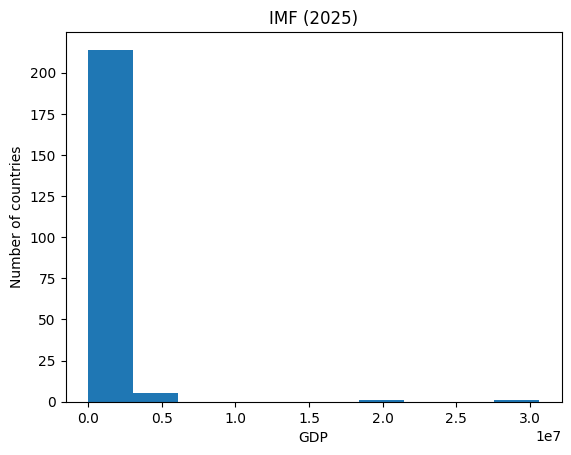

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['IMF (2025)'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

In [ ]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF (2025)'] / df['IMF (2025)'].sum()
df['WB_Share'] = df['World Bank (2024)'] / df['World Bank (2024)'].sum()
df['UN_Share'] = df['United Nations (2024)'] / df['United Nations (2024)'].sum()

df.head(10)


/tmp/ipython-input-703113185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMF_Share'] = df['IMF (2025)'] / df['IMF (2025)'].sum()
/tmp/ipython-input-703113185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WB_Share'] = df['World Bank (2024)'] / df['World Bank (2024)'].sum()
/tmp/ipython-input-703113185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Country,IMF (2025),World Bank (2024),United Nations (2024),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
1,United States,30615743.0,28750956.0,29298000.0,1864787.0,1.386716e+07,0.242827,0.241270,0.247010
2,China[n 1],19398577.0,18743803.0,18743802.0,654774.0,9.158846e+06,0.153859,0.157293,0.158028
3,Germany,5013574.0,4685593.0,4659929.0,327981.0,2.234999e+06,0.039765,0.039320,0.039288
4,Japan,4279828.0,4027598.0,4026211.0,252230.0,1.933172e+06,0.033945,0.033798,0.033945
5,India,4125213.0,3909892.0,3952244.0,215321.0,1.892524e+06,0.032719,0.032811,0.033321
6,United Kingdom,3958780.0,3686033.0,3685881.0,272747.0,1.756789e+06,0.031399,0.030932,0.031075
7,France,3361557.0,3160443.0,3160443.0,201114.0,1.516151e+06,0.026662,0.026522,0.026646
8,Italy,2543677.0,2380825.0,2380825.0,162852.0,1.138719e+06,0.020175,0.019979,0.020073
9,Russia,2540656.0,2173836.0,2173386.0,366820.0,9.799658e+05,0.020151,0.018242,0.018324
10,Canada,2283599.0,2243637.0,2270076.0,39962.0,1.113028e+06,0.018112,0.018828,0.019139


In [ ]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

/tmp/ipython-input-3817382092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])


,Country,IMF (2025),World Bank (2024),United Nations (2024),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
1,United States,3.061574e+07,2.875096e+07,2.929800e+07,1.864787e+06,1.386716e+07,0.242827,0.241270,0.247010,0.004183
2,China[n 1],1.939858e+07,1.874380e+07,1.874380e+07,6.547740e+05,9.158846e+06,0.153859,0.157293,0.158028,0.004169
9,Russia,2.540656e+06,2.173836e+06,2.173386e+06,3.668200e+05,9.799658e+05,0.020151,0.018242,0.018324,0.001827
155,Channel Islands,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
167,Isle of Man,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
169,Guam,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
175,U.S. Virgin Islands,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
207,Northern Mariana Islands,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
209,American Samoa,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299
211,Saint Martin,1.219722e+06,1.146052e+06,9.934405e+05,7.366989e+04,5.314553e+05,0.009674,0.009617,0.008376,0.001299


Друга частина завдань

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mahmoudshogaa/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
df = pd.read_csv(os.path.join(path, "titanic.csv"))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median(skipna=True))

df.drop(['Cabin'], axis=1, inplace=True) # вирішили видалити колонку
df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(f'Data types of the datasef:\n{df.dtypes}')

Data types of the datasef:
Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,32.204208
std,0.486592,0.836071,0.477990,13.019697,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [ ]:
#10
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [ ]:
#11
df.tail()

,Survived,Pclass,Sex,Age,Fare
886,0,2,0,27.0,13.00
887,1,1,1,19.0,30.00
888,0,3,1,28.0,23.45
889,1,1,0,26.0,30.00
890,0,3,0,32.0,7.75


In [ ]:
#12
# Calculate share of survivors by sex
male_survival_rate = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 0].shape[0]
female_survival_rate = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 1].shape[0]

print(f'Share of survived males {male_survival_rate * 100:.2f}%')
print(f'Share of survived females {female_survival_rate * 100:.2f}%')

print(f'Correlation between sex and survival: {df["Sex"].corr(df["Survived"])}')

Share of survived males 18.89%
Share of survived females 74.20%
Correlation between sex and survival: 0.5433513806577555


In [ ]:
#13
class1_surv_rate = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 1].shape[0]
class2_surv_rate = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 2].shape[0]
class3_surv_rate = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == 3].shape[0]

print(f'Share of survived class 1 passengers {class1_surv_rate * 100:.2f}%')
print(f'Share of survived class 2 passengers {class2_surv_rate * 100:.2f}%')
print(f'Share of survived class 3 passengers {class3_surv_rate * 100:.2f}%')

Share of survived class 1 passengers 62.96%
Share of survived class 2 passengers 47.28%
Share of survived class 3 passengers 24.24%


In [ ]:
#14
survived_mean_age = df[df['Survived'] == 1]['Age'].mean()
not_survived_mean_age = df[df['Survived'] == 0]['Age'].mean()

print(f'Mean age of survived passengers: {survived_mean_age:.2f}')
print(f'Mean age of not survived passengers: {not_survived_mean_age:.2f}')

Mean age of survived passengers: 28.29
Mean age of not survived passengers: 30.03


In [ ]:
#15
# Separate dataset in 4 buckets by Fare sorted in ascending order
df['Fare_Category'] = pd.qcut(df['Fare'], 6, labels=False)

# Find share of survivors in each bucket
for i in range(6):
    surv_rate = df[(df['Fare_Category'] == i) & (df['Survived'] == 1)].shape[0] / df[df['Fare_Category'] == i].shape[0]
    print(f'Share of survived passengers in bucket {i}: {surv_rate * 100:.2f}%')

Share of survived passengers in bucket 0: 20.51%
Share of survived passengers in bucket 1: 19.08%
Share of survived passengers in bucket 2: 36.69%
Share of survived passengers in bucket 3: 43.62%
Share of survived passengers in bucket 4: 41.78%
Share of survived passengers in bucket 5: 69.80%


In [ ]:
#16
# Find median fare for the class
for i in range(1, 4):
    median_fare = df[df['Pclass'] == i]['Fare'].median()
    print(f'Median fare for class {i}: {median_fare:.2f}')

Median fare for class 1: 60.29
Median fare for class 2: 14.25
Median fare for class 3: 8.05


<Axes: xlabel='Age', ylabel='Count'>

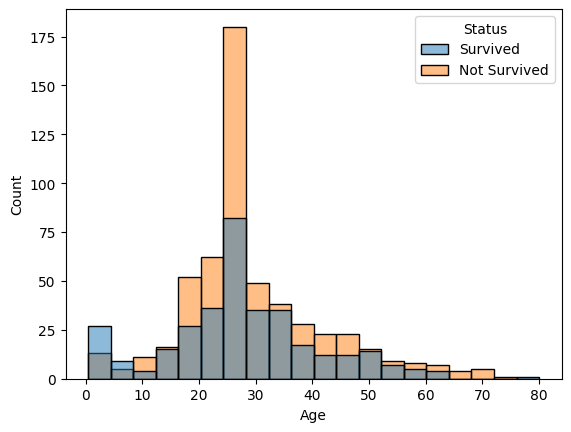

In [ ]:
#17
# Combine the data into a single DataFrame
df_survived = df[df['Survived'] == 1][['Age']]
df_survived['Status'] = 'Survived'

df_not_survived = df[df['Survived'] == 0][['Age']]
df_not_survived['Status'] = 'Not Survived'

df_combined = pd.concat([df_survived, df_not_survived])

# Plot the histogram with hue
sns.histplot(data=df_combined, x='Age', hue='Status', bins=20)

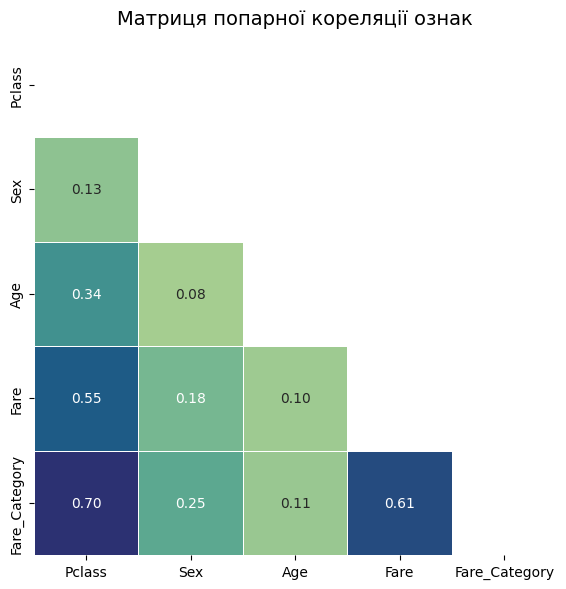

In [ ]:
mtx = df.drop('Survived', axis=1).corr(numeric_only=True).abs()

# Побудова теплової карти кореляції
fig, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхній трикутник
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак", fontsize=14)
plt.tight_layout()
plt.show()